In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1 skillsnetwork
# Note: If your environment doesn't support "!mamba install", use "!pip install"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.5 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
!pip install tqdm skillsnetwork

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 69.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [2]:
!pip3 install  --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [3]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2DTranspose,BatchNormalization,ReLU,Conv2D,LeakyReLU
import time

import keras

from IPython import display
import skillsnetwork
print(f"skillsnetwork version: {skillsnetwork.__version__}")

import matplotlib.pyplot as plt
%matplotlib inline

import os
from os import listdir
from pathlib import Path
import imghdr

from tqdm import tqdm

tensorflow version: 2.18.0
skillsnetwork version: 0.21.9


In [4]:
# This function will allow us to easily plot data taking in x values, y values, and a title
def plot_distribution(real_data,generated_data,discriminator=None,density=True):

    plt.hist(real_data.numpy(), 100, density=density, facecolor='g', alpha=0.75, label='real data')
    plt.hist(generated_data.numpy(), 100, density=density, facecolor='r', alpha=0.75,label='generated data q(z) ')

    if discriminator:
        max_=np.max([int(real_data.numpy().max()),int(generated_data.numpy().max())])
        min_=np.min([int(real_data.numpy().min()),int(generated_data.numpy().min())])
        x=np.linspace(min_, max_, 1000).reshape(-1,1)
        plt.plot(x,tf.math.sigmoid(discriminator(x,training=False).numpy()),label='discriminator',color='k')
        plt.plot(x,0.5*np.ones(x.shape),label='0.5',color='b')
        plt.xlabel('x')

    plt.legend()
    plt.show()

def plot_array(X,title=""):

    plt.rcParams['figure.figsize'] = (20,20)

    for i,x in enumerate(X[0:5]):
        x=x.numpy()
        max_=x.max()
        min_=x.min()
        xnew=np.uint(255*(x-min_)/(max_-min_))
        plt.subplot(1,5,i+1)
        plt.imshow(xnew)
        plt.axis("off")

    plt.show()

In [5]:
mean = [10]
cov = [[1]]
X = tf.random.normal((5000,1),mean=10,stddev=1.0)

print("mean:",np.mean(X))
print("standard deviation:",np.std(X))

mean: 10.017863
standard deviation: 0.99213856


In [6]:
Z = tf.random.normal((5000,1),mean=0,stddev=2)


In [7]:
print("mean:",np.mean(Z))
print("standard deviation:",np.std(Z))

mean: -0.026333228
standard deviation: 1.9953055


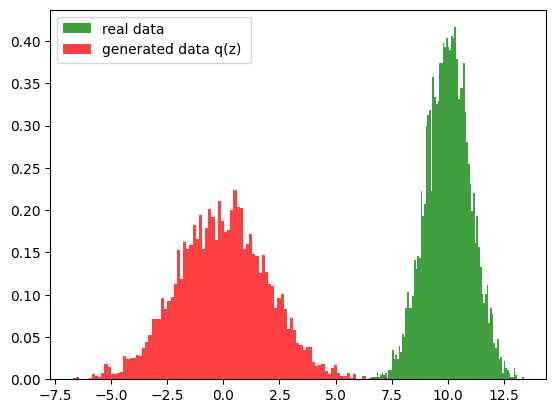

In [8]:
plot_distribution(X,Z,discriminator=None,density=True)

In [9]:
Xhat=Z+10

In [10]:
print("mean:",np.mean(Xhat))
print("standard deviation:",np.std(Xhat))

mean: 9.973667
standard deviation: 1.9953055


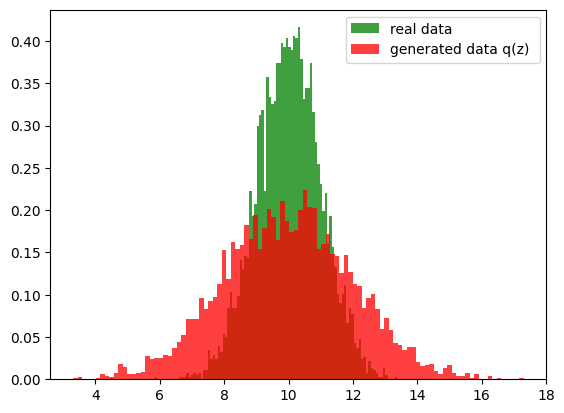

In [11]:
plot_distribution(X,Xhat,discriminator=None,density=True)

In [12]:
def make_generator_model():
    generator = tf.keras.Sequential()
    generator.add(layers.Dense(1))
    return generator

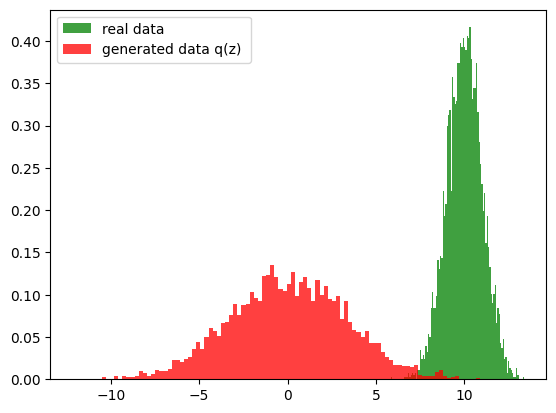

In [13]:
generator=make_generator_model()

Xhat = generator(Z, training=False)
plot_distribution(real_data=X,generated_data=Xhat)

In [14]:
def make_discriminator_model():
    discriminator=tf.keras.Sequential()
    discriminator.add(layers.Dense(1))
    return discriminator

discriminator=make_discriminator_model()

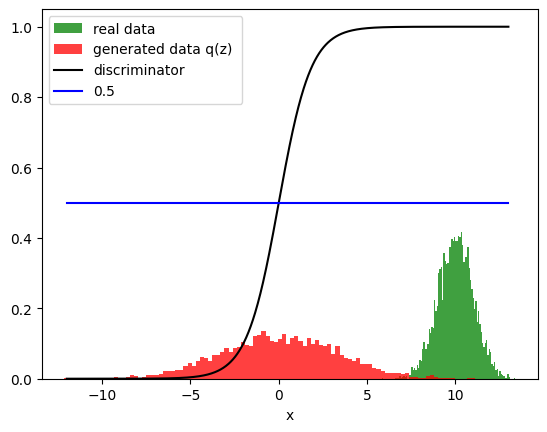

In [15]:
plot_distribution(real_data=X,generated_data=Xhat,discriminator=discriminator)

In [16]:
py_x=tf.math.sigmoid(discriminator(X,training=False))
np.sum(py_x>0.5)

5000

In [17]:
py_x=discriminator(Xhat)
np.sum(py_x>0.5)

2262

In [18]:
def get_accuracy(X,Xhat):
    total=0
    py_x=tf.math.sigmoid(discriminator(X,training=False))
    total=np.mean(py_x)
    py_x=tf.math.sigmoid(discriminator(Xhat,training=False))
    total+=np.mean(py_x)
    return total/2

In [19]:
get_accuracy(X,Xhat)

0.7528126239776611

In [20]:
# This method returns a helper function to compute crossentropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(Xhat):
    return cross_entropy(tf.ones_like(Xhat), Xhat)

In [21]:
def discriminator_loss(X, Xhat):
    real_loss = cross_entropy(tf.ones_like(X), X)
    fake_loss = cross_entropy(tf.zeros_like(Xhat), Xhat)
    total_loss = 0.5*(real_loss + fake_loss)
    return total_loss

In [22]:
generator_optimizer = tf.keras.optimizers.Adam(5e-1,beta_1=0.5,beta_2=0.8)

discriminator_optimizer = tf.keras.optimizers.Adam(5e-1,beta_1=0.5, beta_2=0.8)

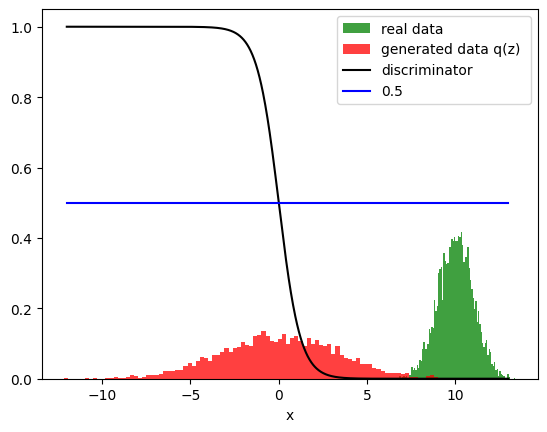

epoch 0


  0%|          | 0/20 [00:00<?, ?it/s]

0.25633177161216736


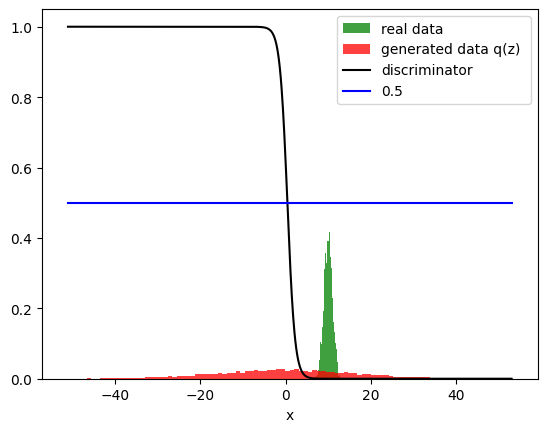

  5%|▌         | 1/20 [00:02<00:47,  2.48s/it]

epoch 0
0.29076600074768066


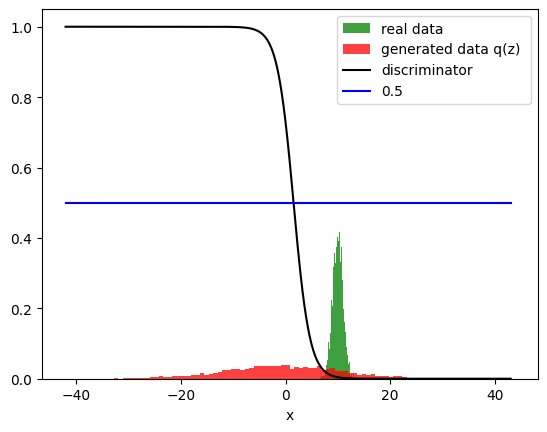

 10%|█         | 2/20 [00:03<00:26,  1.50s/it]

epoch 1
0.6202451586723328


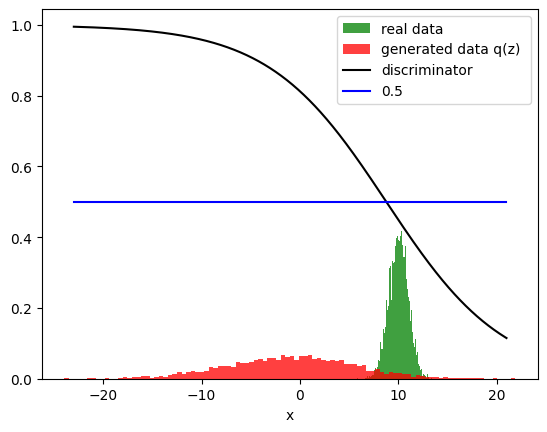

 25%|██▌       | 5/20 [00:04<00:07,  1.95it/s]

epoch 2
0.6161074042320251


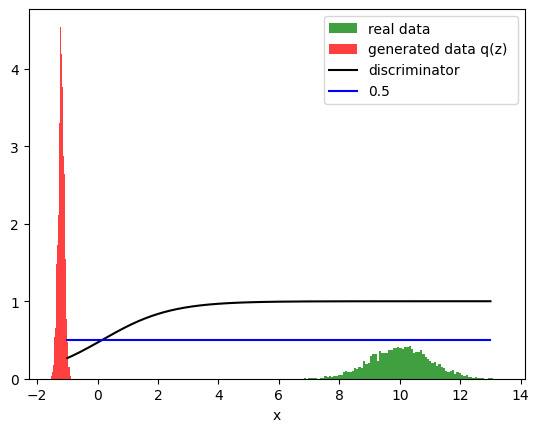

 55%|█████▌    | 11/20 [00:04<00:01,  4.65it/s]

epoch 7


 70%|███████   | 14/20 [00:04<00:00,  6.64it/s]

0.5819393396377563


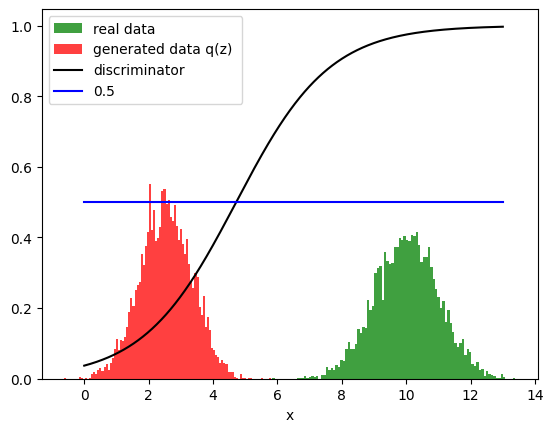

epoch 14
0.4986175298690796


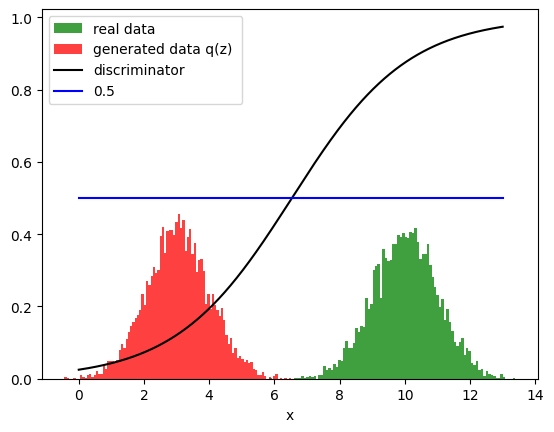

 90%|█████████ | 18/20 [00:06<00:00,  4.86it/s]

epoch 15


100%|██████████| 20/20 [00:06<00:00,  3.16it/s]


In [23]:
#parameters for training
epochs=20
BATCH_SIZE=5000
noise_dim=1
epsilon=100


#discrimator and gernerator
tf.random.set_seed(0)
discriminator=make_discriminator_model()
generator=make_generator_model()

tf.config.run_functions_eagerly(True)



gen_loss_epoch=[]
disc_loss_epoch=[]
plot_distribution(real_data=X,generated_data=Xhat,discriminator=discriminator )
print("epoch",0)

for epoch in tqdm(range(epochs)):
    #data for the true distribution of your real data samples training ste
    x = tf.random.normal((BATCH_SIZE,1),mean=10,stddev=1.0)
    #random samples it was found if you increase the standard deviation, you get better results
    z= tf.random.normal([BATCH_SIZE, noise_dim],mean=0,stddev=10)
    # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample
        xhat = generator(z, training=True)
        #the output of the discriminator for real data
        real_output = discriminator(x, training=True)
        #the output of the discriminator  data
        fake_output = discriminator(xhat, training=True)
        #loss for each
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    # Compute the gradients for gen_loss and generator
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  # Save and display the generator and discriminator if the performance increases
    if abs(0.5-get_accuracy(x,xhat))<epsilon:
        epsilon=abs(0.5-get_accuracy(x,xhat))
        generator.save('generator.keras')
        discriminator.save('discriminator.keras')
        print(get_accuracy(x,xhat))
        plot_distribution(real_data=X,generated_data=xhat,discriminator=discriminator )
        print("epoch",epoch)

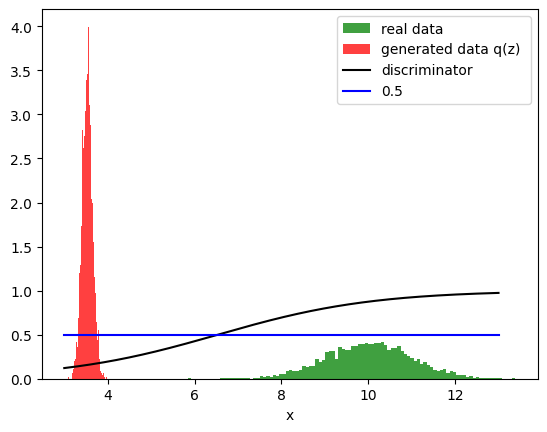

In [24]:
generator=make_generator_model()
generator= models.load_model('generator.keras')
xhat=generator(z)
discriminator=models.load_model('discriminator.keras')
plot_distribution(real_data=X,generated_data=xhat,discriminator=discriminator )

In [25]:
from google.colab import files
files.upload()  # Unggah file kaggle.json

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d splcher/animefacedataset
!unzip animefacedataset.zip -d /content/animefacedataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/animefacedataset/images/62764_2019.jpg  
  inflating: /content/animefacedataset/images/62765_2019.jpg  
  inflating: /content/animefacedataset/images/62766_2019.jpg  
  inflating: /content/animefacedataset/images/62767_2019.jpg  
  inflating: /content/animefacedataset/images/62768_2019.jpg  
  inflating: /content/animefacedataset/images/62769_2019.jpg  
  inflating: /content/animefacedataset/images/6276_2003.jpg  
  inflating: /content/animefacedataset/images/62770_2019.jpg  
  inflating: /content/animefacedataset/images/62771_2019.jpg  
  inflating: /content/animefacedataset/images/62772_2019.jpg  
  inflating: /content/animefacedataset/images/62773_2019.jpg  
  inflating: /content/animefacedataset/images/62774_2019.jpg  
  inflating: /content/animefacedataset/images/62775_2019.jpg  
  inflating: /content/animefacedataset/images/62776_2019.jpg  
  inflating: /content/animefacedataset/images/62777_2019.jpg  
  inf

In [26]:
from google.colab import output
output.enable_custom_widget_manager()

In [27]:
from google.colab import output
output.disable_custom_widget_manager()

In [28]:
from google.colab import output
output.enable_custom_widget_manager()

In [29]:
from google.colab import output
output.disable_custom_widget_manager()

In [30]:
img_height, img_width, batch_size=64,64,128

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory='animefacedataset/images',
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size,
                                                       label_mode=None)

Found 63565 files.


In [32]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [33]:
normalization_layer = layers.Rescaling(scale= 1./127.5, offset=-1)
normalized_ds = train_ds.map(lambda x: normalization_layer(x))

In [34]:
images=train_ds.take(1)

In [35]:
X=[x for x in images]

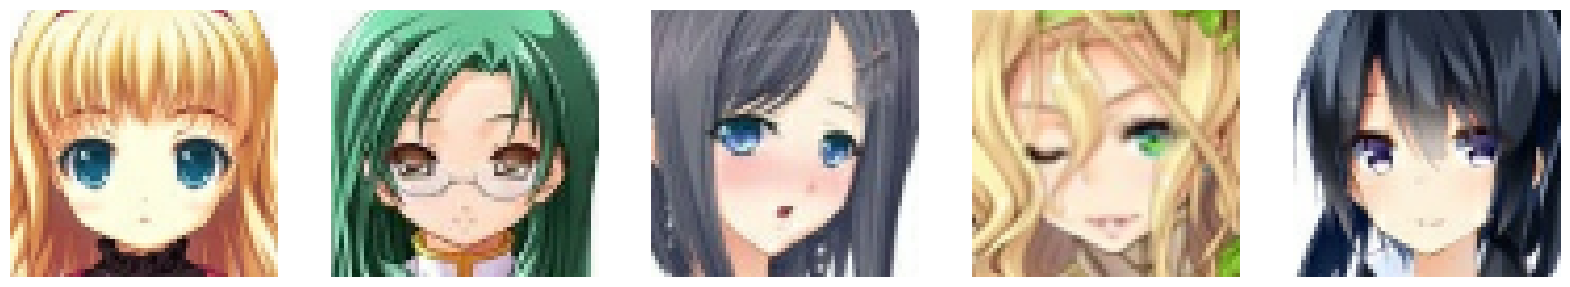

In [36]:
plot_array(X[0])

In [37]:
from tensorflow.keras import Model

def make_generator():
    # Create input layer explicitly
    inputs = Input(shape=(1, 1, 100), name='input_layer')

    # Block 1: input is latent vector -> 4x4x512
    x = Conv2DTranspose(64 * 8, kernel_size=4, strides=4, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_1')(inputs)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_1')(x)
    x = ReLU(name='relu_1')(x)

    # Block 2: 4x4x512 -> 8x8x256
    x = Conv2DTranspose(64 * 4, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_2')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_2')(x)
    x = ReLU(name='relu_2')(x)

    # Block 3: 8x8x256 -> 16x16x128
    x = Conv2DTranspose(64 * 2, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_3')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_3')(x)
    x = ReLU(name='relu_3')(x)

    # Block 4: 16x16x128 -> 32x32x64
    x = Conv2DTranspose(64 * 1, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_4')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_4')(x)
    x = ReLU(name='relu_4')(x)

    # Final Block: 32x32x64 -> 64x64x3
    outputs = Conv2DTranspose(3, kernel_size=4, strides=2, padding='same',
                            kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                            use_bias=False, activation='tanh',
                            name='conv_transpose_5')(x)

    # Create model using functional API
    model = Model(inputs=inputs, outputs=outputs, name='generator')

    return model

In [38]:
gen = make_generator()
gen.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 1, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_1 (Conv2DTranspose)   │ (None, 4, 4, 512)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_1 (BatchNormalization)            │ (None, 4, 4, 512)           │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_1 (ReLU)                        │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_2 (Conv2DTranspose)   │ (None, 8, 8, 256)           │       2,097,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_2 (BatchNormalization)            │ (None, 8, 8, 256)           │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_2 (ReLU)                        │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_3 (Conv2DTranspose)   │ (None, 16, 16, 128)         │         524,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_3 (BatchNormalization)            │ (None, 16, 16, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_3 (ReLU)                        │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_4 (Conv2DTranspose)   │ (None, 32, 32, 64)          │         131,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_4 (BatchNormalization)            │ (None, 32, 32, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_4 (ReLU)                        │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_5 (Conv2DTranspose)   │ (None, 64, 64, 3)           │           3,072 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,578,624 (13.65 MB)

 Trainable params: 3,576,704 (13.64 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [39]:
def make_discriminator():

    model=Sequential()

    # Block 1: input is 64 x 64 x (3)
    model.add(Input(shape=(64, 64, 3), name='input_layer'))
    model.add(Conv2D(64, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_1'))

    # Block 2: input is 32 x 32 x (64)
    model.add(Conv2D(64 * 2, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_2'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_2'))

    # Block 3
    model.add(Conv2D(64 * 4, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_3'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_2'))
    model.add(LeakyReLU(0.2, name='leaky_relu_3'))


    #Block 4
    model.add(Conv2D(64 * 8, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_4'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_3'))
    model.add(LeakyReLU(0.2, name='leaky_relu_4'))


    #Block 5
    model.add(Conv2D(1, 4, 2,padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False,
                     activation='sigmoid', name='conv_5'))

    return model

In [40]:
disc = make_discriminator()
disc.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                      │ (None, 32, 32, 64)          │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_1 (LeakyReLU)             │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 16, 16, 128)         │         131,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_1 (BatchNormalization)            │ (None, 16, 16, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_2 (LeakyReLU)             │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3 (Conv2D)                      │ (None, 8, 8, 256)           │         524,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_2 (BatchNormalization)            │ (None, 8, 8, 256)           │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_3 (LeakyReLU)             │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_4 (Conv2D)                      │ (None, 4, 4, 512)           │       2,097,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_3 (BatchNormalization)            │ (None, 4, 4, 512)           │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_4 (LeakyReLU)             │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_5 (Conv2D)                      │ (None, 2, 2, 1)             │           8,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,767,360 (10.56 MB)

 Trainable params: 2,765,568 (10.55 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [41]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [42]:
def generator_loss(Xhat):
    return cross_entropy(tf.ones_like(Xhat), Xhat)

In [43]:
def discriminator_loss(X, Xhat):
    real_loss = cross_entropy(tf.ones_like(X), X)
    fake_loss = cross_entropy(tf.zeros_like(Xhat), Xhat)
    total_loss = 0.5*(real_loss + fake_loss)
    return total_loss

In [44]:
learning_rate = 0.0002

generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

In [45]:
@tf.function

def train_step(X):

    #random samples it was found if you increase the  stander deviation, you get better results
    z= tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
      # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample
        xhat = generator(z, training=True)
        #the output of the discriminator for real data
        real_output = discriminator(X, training=True)
        #the output of the discriminator for fake data
        fake_output = discriminator(xhat, training=True)

        #loss for each
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
      # Compute the gradients for gen_loss and generator

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

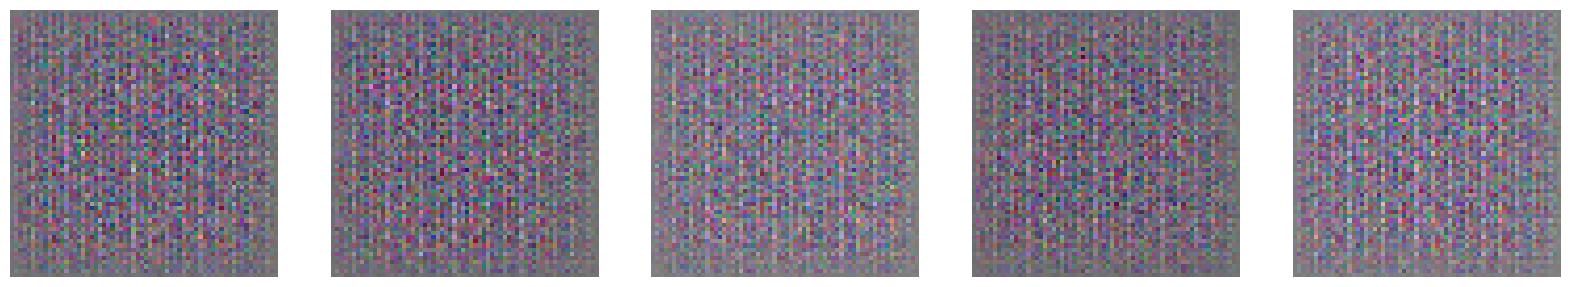

In [46]:
generator= make_generator()
BATCH_SIZE=128

latent_dim=100
noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
Xhat=generator(noise,training=False)
plot_array(Xhat)

epoch 1:   0%|          | 0/497 [00:00<?, ?it/s]

epoch 1, iteration 1


epoch 1:   0%|          | 1/497 [00:02<17:40,  2.14s/it]

epoch 1, iteration 2


epoch 1:   0%|          | 2/497 [00:02<08:57,  1.09s/it]

epoch 1, iteration 3


epoch 1:   1%|          | 3/497 [00:02<06:11,  1.33it/s]

epoch 1, iteration 4


epoch 1:   1%|          | 4/497 [00:03<04:53,  1.68it/s]

epoch 1, iteration 5


epoch 1:   1%|          | 5/497 [00:03<04:09,  1.97it/s]

epoch 1, iteration 6


epoch 1:   1%|          | 6/497 [00:03<03:43,  2.20it/s]

epoch 1, iteration 7


epoch 1:   1%|▏         | 7/497 [00:04<03:27,  2.36it/s]

epoch 1, iteration 8


epoch 1:   2%|▏         | 8/497 [00:04<03:16,  2.48it/s]

epoch 1, iteration 9


epoch 1:   2%|▏         | 9/497 [00:04<03:07,  2.60it/s]

epoch 1, iteration 10


epoch 1:   2%|▏         | 10/497 [00:05<03:02,  2.66it/s]

epoch 1, iteration 11


epoch 1:   2%|▏         | 11/497 [00:05<03:00,  2.69it/s]

epoch 1, iteration 12


epoch 1:   2%|▏         | 12/497 [00:06<02:57,  2.73it/s]

epoch 1, iteration 13


epoch 1:   3%|▎         | 13/497 [00:06<02:56,  2.74it/s]

epoch 1, iteration 14


epoch 1:   3%|▎         | 14/497 [00:06<02:54,  2.76it/s]

epoch 1, iteration 15


epoch 1:   3%|▎         | 15/497 [00:07<02:53,  2.77it/s]

epoch 1, iteration 16


epoch 1:   3%|▎         | 16/497 [00:07<02:53,  2.77it/s]

epoch 1, iteration 17


epoch 1:   3%|▎         | 17/497 [00:07<02:51,  2.79it/s]

epoch 1, iteration 18


epoch 1:   4%|▎         | 18/497 [00:08<02:50,  2.81it/s]

epoch 1, iteration 19


epoch 1:   4%|▍         | 19/497 [00:08<02:52,  2.77it/s]

epoch 1, iteration 20


epoch 1:   4%|▍         | 20/497 [00:08<03:03,  2.59it/s]

epoch 1, iteration 21


epoch 1:   4%|▍         | 21/497 [00:09<03:11,  2.49it/s]

epoch 1, iteration 22


epoch 1:   4%|▍         | 22/497 [00:09<03:12,  2.47it/s]

epoch 1, iteration 23


epoch 1:   5%|▍         | 23/497 [00:10<03:22,  2.35it/s]

epoch 1, iteration 24


epoch 1:   5%|▍         | 24/497 [00:10<03:28,  2.27it/s]

epoch 1, iteration 25


epoch 1:   5%|▌         | 25/497 [00:11<03:25,  2.30it/s]

epoch 1, iteration 26


epoch 1:   5%|▌         | 26/497 [00:11<03:14,  2.42it/s]

epoch 1, iteration 27


epoch 1:   5%|▌         | 27/497 [00:11<03:03,  2.57it/s]

epoch 1, iteration 28


epoch 1:   6%|▌         | 28/497 [00:12<02:57,  2.65it/s]

epoch 1, iteration 29


epoch 1:   6%|▌         | 29/497 [00:12<02:53,  2.70it/s]

epoch 1, iteration 30


epoch 1:   6%|▌         | 30/497 [00:12<02:50,  2.74it/s]

epoch 1, iteration 31


epoch 1:   6%|▌         | 31/497 [00:13<02:47,  2.78it/s]

epoch 1, iteration 32


epoch 1:   6%|▋         | 32/497 [00:13<02:45,  2.81it/s]

epoch 1, iteration 33


epoch 1:   7%|▋         | 33/497 [00:14<02:44,  2.82it/s]

epoch 1, iteration 34


epoch 1:   7%|▋         | 34/497 [00:14<02:43,  2.83it/s]

epoch 1, iteration 35


epoch 1:   7%|▋         | 35/497 [00:14<02:44,  2.81it/s]

epoch 1, iteration 36


epoch 1:   7%|▋         | 36/497 [00:15<02:43,  2.81it/s]

epoch 1, iteration 37


epoch 1:   7%|▋         | 37/497 [00:15<02:42,  2.82it/s]

epoch 1, iteration 38


epoch 1:   8%|▊         | 38/497 [00:15<02:41,  2.83it/s]

epoch 1, iteration 39


epoch 1:   8%|▊         | 39/497 [00:16<02:39,  2.87it/s]

epoch 1, iteration 40


epoch 1:   8%|▊         | 40/497 [00:16<02:39,  2.87it/s]

epoch 1, iteration 41


epoch 1:   8%|▊         | 41/497 [00:16<02:37,  2.89it/s]

epoch 1, iteration 42


epoch 1:   8%|▊         | 42/497 [00:17<02:39,  2.86it/s]

epoch 1, iteration 43


epoch 1:   9%|▊         | 43/497 [00:17<02:38,  2.87it/s]

epoch 1, iteration 44


epoch 1:   9%|▉         | 44/497 [00:17<02:39,  2.84it/s]

epoch 1, iteration 45


epoch 1:   9%|▉         | 45/497 [00:18<02:38,  2.86it/s]

epoch 1, iteration 46


epoch 1:   9%|▉         | 46/497 [00:18<02:37,  2.87it/s]

epoch 1, iteration 47


epoch 1:   9%|▉         | 47/497 [00:18<02:35,  2.89it/s]

epoch 1, iteration 48


epoch 1:  10%|▉         | 48/497 [00:19<02:37,  2.86it/s]

epoch 1, iteration 49


epoch 1:  10%|▉         | 49/497 [00:19<02:36,  2.86it/s]

epoch 1, iteration 50


epoch 1:  10%|█         | 50/497 [00:19<02:37,  2.85it/s]

epoch 1, iteration 51


epoch 1:  10%|█         | 51/497 [00:20<02:35,  2.86it/s]

epoch 1, iteration 52


epoch 1:  10%|█         | 52/497 [00:20<02:33,  2.89it/s]

epoch 1, iteration 53


epoch 1:  11%|█         | 53/497 [00:21<02:34,  2.87it/s]

epoch 1, iteration 54


epoch 1:  11%|█         | 54/497 [00:21<02:43,  2.72it/s]

epoch 1, iteration 55


epoch 1:  11%|█         | 55/497 [00:21<02:48,  2.62it/s]

epoch 1, iteration 56


epoch 1:  11%|█▏        | 56/497 [00:22<02:52,  2.56it/s]

epoch 1, iteration 57


epoch 1:  11%|█▏        | 57/497 [00:22<02:58,  2.46it/s]

epoch 1, iteration 58


epoch 1:  12%|█▏        | 58/497 [00:23<03:08,  2.33it/s]

epoch 1, iteration 59


epoch 1:  12%|█▏        | 59/497 [00:23<03:13,  2.26it/s]

epoch 1, iteration 60


epoch 1:  12%|█▏        | 60/497 [00:23<02:59,  2.43it/s]

epoch 1, iteration 61


epoch 1:  12%|█▏        | 61/497 [00:24<02:51,  2.54it/s]

epoch 1, iteration 62


epoch 1:  12%|█▏        | 62/497 [00:24<02:44,  2.64it/s]

epoch 1, iteration 63


epoch 1:  13%|█▎        | 63/497 [00:25<02:38,  2.74it/s]

epoch 1, iteration 64


epoch 1:  13%|█▎        | 64/497 [00:25<02:37,  2.75it/s]

epoch 1, iteration 65


epoch 1:  13%|█▎        | 65/497 [00:25<02:35,  2.78it/s]

epoch 1, iteration 66


epoch 1:  13%|█▎        | 66/497 [00:26<02:33,  2.81it/s]

epoch 1, iteration 67


epoch 1:  13%|█▎        | 67/497 [00:26<02:33,  2.80it/s]

epoch 1, iteration 68


epoch 1:  14%|█▎        | 68/497 [00:26<02:31,  2.83it/s]

epoch 1, iteration 69


epoch 1:  14%|█▍        | 69/497 [00:27<02:30,  2.85it/s]

epoch 1, iteration 70


epoch 1:  14%|█▍        | 70/497 [00:27<02:30,  2.85it/s]

epoch 1, iteration 71


epoch 1:  14%|█▍        | 71/497 [00:27<02:29,  2.86it/s]

epoch 1, iteration 72


epoch 1:  14%|█▍        | 72/497 [00:28<02:26,  2.90it/s]

epoch 1, iteration 73


epoch 1:  15%|█▍        | 73/497 [00:28<02:28,  2.85it/s]

epoch 1, iteration 74


epoch 1:  15%|█▍        | 74/497 [00:28<02:27,  2.87it/s]

epoch 1, iteration 75


epoch 1:  15%|█▌        | 75/497 [00:29<02:27,  2.86it/s]

epoch 1, iteration 76


epoch 1:  15%|█▌        | 76/497 [00:29<02:29,  2.81it/s]

epoch 1, iteration 77


epoch 1:  15%|█▌        | 77/497 [00:29<02:28,  2.83it/s]

epoch 1, iteration 78


epoch 1:  16%|█▌        | 78/497 [00:30<02:28,  2.83it/s]

epoch 1, iteration 79


epoch 1:  16%|█▌        | 79/497 [00:30<02:26,  2.85it/s]

epoch 1, iteration 80


epoch 1:  16%|█▌        | 80/497 [00:30<02:26,  2.85it/s]

epoch 1, iteration 81


epoch 1:  16%|█▋        | 81/497 [00:31<02:28,  2.80it/s]

epoch 1, iteration 82


epoch 1:  16%|█▋        | 82/497 [00:31<02:26,  2.84it/s]

epoch 1, iteration 83


epoch 1:  17%|█▋        | 83/497 [00:32<02:26,  2.83it/s]

epoch 1, iteration 84


epoch 1:  17%|█▋        | 84/497 [00:32<02:27,  2.79it/s]

epoch 1, iteration 85


epoch 1:  17%|█▋        | 85/497 [00:32<02:26,  2.81it/s]

epoch 1, iteration 86


epoch 1:  17%|█▋        | 86/497 [00:33<02:25,  2.82it/s]

epoch 1, iteration 87


epoch 1:  18%|█▊        | 87/497 [00:33<02:25,  2.82it/s]

epoch 1, iteration 88


epoch 1:  18%|█▊        | 88/497 [00:33<02:28,  2.75it/s]

epoch 1, iteration 89


epoch 1:  18%|█▊        | 89/497 [00:34<02:37,  2.58it/s]

epoch 1, iteration 90


epoch 1:  18%|█▊        | 90/497 [00:34<02:43,  2.48it/s]

epoch 1, iteration 91


epoch 1:  18%|█▊        | 91/497 [00:35<02:47,  2.42it/s]

epoch 1, iteration 92


epoch 1:  19%|█▊        | 92/497 [00:35<02:56,  2.29it/s]

epoch 1, iteration 93


epoch 1:  19%|█▊        | 93/497 [00:36<02:58,  2.26it/s]

epoch 1, iteration 94


epoch 1:  19%|█▉        | 94/497 [00:36<02:51,  2.35it/s]

epoch 1, iteration 95


epoch 1:  19%|█▉        | 95/497 [00:36<02:42,  2.47it/s]

epoch 1, iteration 96


epoch 1:  19%|█▉        | 96/497 [00:37<02:35,  2.57it/s]

epoch 1, iteration 97


epoch 1:  20%|█▉        | 97/497 [00:37<02:31,  2.63it/s]

epoch 1, iteration 98


epoch 1:  20%|█▉        | 98/497 [00:37<02:27,  2.70it/s]

epoch 1, iteration 99


epoch 1:  20%|█▉        | 99/497 [00:38<02:25,  2.74it/s]

epoch 1, iteration 100


epoch 1:  20%|██        | 100/497 [00:38<02:24,  2.75it/s]

epoch 1, iteration 101


epoch 1:  20%|██        | 101/497 [00:38<02:22,  2.78it/s]

epoch 1, iteration 102


epoch 1:  21%|██        | 102/497 [00:39<02:21,  2.78it/s]

epoch 1, iteration 103


epoch 1:  21%|██        | 103/497 [00:39<02:18,  2.84it/s]

epoch 1, iteration 104


epoch 1:  21%|██        | 104/497 [00:40<02:17,  2.85it/s]

epoch 1, iteration 105


epoch 1:  21%|██        | 105/497 [00:40<02:19,  2.81it/s]

epoch 1, iteration 106


epoch 1:  21%|██▏       | 106/497 [00:40<02:17,  2.84it/s]

epoch 1, iteration 107


epoch 1:  22%|██▏       | 107/497 [00:41<02:44,  2.37it/s]

epoch 1, iteration 108


epoch 1:  22%|██▏       | 108/497 [00:41<02:35,  2.50it/s]

epoch 1, iteration 109


epoch 1:  22%|██▏       | 109/497 [00:42<02:51,  2.26it/s]

epoch 1, iteration 110


epoch 1:  22%|██▏       | 110/497 [00:42<02:43,  2.37it/s]

epoch 1, iteration 111


epoch 1:  22%|██▏       | 111/497 [00:43<03:02,  2.11it/s]

epoch 1, iteration 112


epoch 1:  23%|██▎       | 112/497 [00:43<02:47,  2.29it/s]

epoch 1, iteration 113


epoch 1:  23%|██▎       | 113/497 [00:43<02:36,  2.45it/s]

epoch 1, iteration 114


epoch 1:  23%|██▎       | 114/497 [00:44<02:28,  2.58it/s]

epoch 1, iteration 115


epoch 1:  23%|██▎       | 115/497 [00:44<02:23,  2.66it/s]

epoch 1, iteration 116


epoch 1:  23%|██▎       | 116/497 [00:44<02:19,  2.72it/s]

epoch 1, iteration 117


epoch 1:  24%|██▎       | 117/497 [00:45<02:17,  2.77it/s]

epoch 1, iteration 118


epoch 1:  24%|██▎       | 118/497 [00:45<02:15,  2.79it/s]

epoch 1, iteration 119


epoch 1:  24%|██▍       | 119/497 [00:45<02:13,  2.82it/s]

epoch 1, iteration 120


epoch 1:  24%|██▍       | 120/497 [00:46<02:19,  2.69it/s]

epoch 1, iteration 121


epoch 1:  24%|██▍       | 121/497 [00:46<02:25,  2.58it/s]

epoch 1, iteration 122


epoch 1:  25%|██▍       | 122/497 [00:47<02:27,  2.54it/s]

epoch 1, iteration 123


epoch 1:  25%|██▍       | 123/497 [00:47<02:31,  2.47it/s]

epoch 1, iteration 124


epoch 1:  25%|██▍       | 124/497 [00:48<02:35,  2.39it/s]

epoch 1, iteration 125


epoch 1:  25%|██▌       | 125/497 [00:48<02:38,  2.35it/s]

epoch 1, iteration 126


epoch 1:  25%|██▌       | 126/497 [00:48<02:33,  2.41it/s]

epoch 1, iteration 127


epoch 1:  26%|██▌       | 127/497 [00:49<02:26,  2.53it/s]

epoch 1, iteration 128


epoch 1:  26%|██▌       | 128/497 [00:49<02:19,  2.64it/s]

epoch 1, iteration 129


epoch 1:  26%|██▌       | 129/497 [00:49<02:16,  2.70it/s]

epoch 1, iteration 130


epoch 1:  26%|██▌       | 130/497 [00:50<02:13,  2.75it/s]

epoch 1, iteration 131


epoch 1:  26%|██▋       | 131/497 [00:50<02:11,  2.78it/s]

epoch 1, iteration 132


epoch 1:  27%|██▋       | 132/497 [00:51<02:11,  2.78it/s]

epoch 1, iteration 133


epoch 1:  27%|██▋       | 133/497 [00:51<02:10,  2.80it/s]

epoch 1, iteration 134


epoch 1:  27%|██▋       | 134/497 [00:51<02:07,  2.85it/s]

epoch 1, iteration 135


epoch 1:  27%|██▋       | 135/497 [00:52<02:07,  2.85it/s]

epoch 1, iteration 136


epoch 1:  27%|██▋       | 136/497 [00:52<02:06,  2.85it/s]

epoch 1, iteration 137


epoch 1:  28%|██▊       | 137/497 [00:52<02:05,  2.87it/s]

epoch 1, iteration 138


epoch 1:  28%|██▊       | 138/497 [00:53<02:06,  2.83it/s]

epoch 1, iteration 139


epoch 1:  28%|██▊       | 139/497 [00:53<02:04,  2.87it/s]

epoch 1, iteration 140


epoch 1:  28%|██▊       | 140/497 [00:53<02:03,  2.88it/s]

epoch 1, iteration 141


epoch 1:  28%|██▊       | 141/497 [00:54<02:02,  2.90it/s]

epoch 1, iteration 142


epoch 1:  29%|██▊       | 142/497 [00:54<02:03,  2.88it/s]

epoch 1, iteration 143


epoch 1:  29%|██▉       | 143/497 [00:54<02:02,  2.89it/s]

epoch 1, iteration 144


epoch 1:  29%|██▉       | 144/497 [00:55<02:01,  2.91it/s]

epoch 1, iteration 145


epoch 1:  29%|██▉       | 145/497 [00:55<02:00,  2.91it/s]

epoch 1, iteration 146


epoch 1:  29%|██▉       | 146/497 [00:55<02:01,  2.89it/s]

epoch 1, iteration 147


epoch 1:  30%|██▉       | 147/497 [00:56<02:02,  2.87it/s]

epoch 1, iteration 148


epoch 1:  30%|██▉       | 148/497 [00:56<02:01,  2.86it/s]

epoch 1, iteration 149


epoch 1:  30%|██▉       | 149/497 [00:56<02:01,  2.87it/s]

epoch 1, iteration 150


epoch 1:  30%|███       | 150/497 [00:57<02:01,  2.86it/s]

epoch 1, iteration 151


epoch 1:  30%|███       | 151/497 [00:57<02:00,  2.87it/s]

epoch 1, iteration 152


epoch 1:  31%|███       | 152/497 [00:57<01:59,  2.88it/s]

epoch 1, iteration 153


epoch 1:  31%|███       | 153/497 [00:58<02:23,  2.39it/s]

epoch 1, iteration 154


epoch 1:  31%|███       | 154/497 [00:58<02:25,  2.35it/s]

epoch 1, iteration 155


epoch 1:  31%|███       | 155/497 [00:59<03:22,  1.69it/s]

epoch 1, iteration 156


epoch 1:  31%|███▏      | 156/497 [01:00<03:18,  1.72it/s]

epoch 1, iteration 157


epoch 1:  32%|███▏      | 157/497 [01:01<03:47,  1.49it/s]

epoch 1, iteration 158


epoch 1:  32%|███▏      | 158/497 [01:01<03:18,  1.71it/s]

epoch 1, iteration 159


epoch 1:  32%|███▏      | 159/497 [01:02<02:53,  1.95it/s]

epoch 1, iteration 160


epoch 1:  32%|███▏      | 160/497 [01:02<02:35,  2.16it/s]

epoch 1, iteration 161


epoch 1:  32%|███▏      | 161/497 [01:02<02:22,  2.36it/s]

epoch 1, iteration 162


epoch 1:  33%|███▎      | 162/497 [01:03<02:13,  2.52it/s]

epoch 1, iteration 163


epoch 1:  33%|███▎      | 163/497 [01:03<02:06,  2.63it/s]

epoch 1, iteration 164


epoch 1:  33%|███▎      | 164/497 [01:03<02:02,  2.72it/s]

epoch 1, iteration 165


epoch 1:  33%|███▎      | 165/497 [01:04<01:58,  2.80it/s]

epoch 1, iteration 166


epoch 1:  33%|███▎      | 166/497 [01:04<01:56,  2.85it/s]

epoch 1, iteration 167


epoch 1:  34%|███▎      | 167/497 [01:04<01:53,  2.90it/s]

epoch 1, iteration 168


epoch 1:  34%|███▍      | 168/497 [01:05<01:53,  2.90it/s]

epoch 1, iteration 169


epoch 1:  34%|███▍      | 169/497 [01:05<01:53,  2.88it/s]

epoch 1, iteration 170


epoch 1:  34%|███▍      | 170/497 [01:05<01:51,  2.92it/s]

epoch 1, iteration 171


epoch 1:  34%|███▍      | 171/497 [01:06<01:51,  2.92it/s]

epoch 1, iteration 172


epoch 1:  35%|███▍      | 172/497 [01:06<01:52,  2.88it/s]

epoch 1, iteration 173


epoch 1:  35%|███▍      | 173/497 [01:06<01:53,  2.86it/s]

epoch 1, iteration 174


epoch 1:  35%|███▌      | 174/497 [01:07<01:52,  2.88it/s]

epoch 1, iteration 175


epoch 1:  35%|███▌      | 175/497 [01:07<01:52,  2.87it/s]

epoch 1, iteration 176


epoch 1:  35%|███▌      | 176/497 [01:07<01:51,  2.88it/s]

epoch 1, iteration 177


epoch 1:  36%|███▌      | 177/497 [01:08<01:49,  2.91it/s]

epoch 1, iteration 178


epoch 1:  36%|███▌      | 178/497 [01:08<01:49,  2.90it/s]

epoch 1, iteration 179


epoch 1:  36%|███▌      | 179/497 [01:08<01:49,  2.91it/s]

epoch 1, iteration 180


epoch 1:  36%|███▌      | 180/497 [01:09<01:48,  2.92it/s]

epoch 1, iteration 181


epoch 1:  36%|███▋      | 181/497 [01:09<01:48,  2.92it/s]

epoch 1, iteration 182


epoch 1:  37%|███▋      | 182/497 [01:09<01:47,  2.92it/s]

epoch 1, iteration 183


epoch 1:  37%|███▋      | 183/497 [01:10<01:47,  2.93it/s]

epoch 1, iteration 184


epoch 1:  37%|███▋      | 184/497 [01:10<01:47,  2.92it/s]

epoch 1, iteration 185


epoch 1:  37%|███▋      | 185/497 [01:11<01:46,  2.92it/s]

epoch 1, iteration 186


epoch 1:  37%|███▋      | 186/497 [01:11<01:48,  2.88it/s]

epoch 1, iteration 187


epoch 1:  38%|███▊      | 187/497 [01:11<01:52,  2.75it/s]

epoch 1, iteration 188


epoch 1:  38%|███▊      | 188/497 [01:12<01:55,  2.67it/s]

epoch 1, iteration 189


epoch 1:  38%|███▊      | 189/497 [01:12<02:00,  2.56it/s]

epoch 1, iteration 190


epoch 1:  38%|███▊      | 190/497 [01:13<02:03,  2.49it/s]

epoch 1, iteration 191


epoch 1:  38%|███▊      | 191/497 [01:13<02:09,  2.36it/s]

epoch 1, iteration 192


epoch 1:  39%|███▊      | 192/497 [01:13<02:12,  2.30it/s]

epoch 1, iteration 193


epoch 1:  39%|███▉      | 193/497 [01:14<02:04,  2.45it/s]

epoch 1, iteration 194


epoch 1:  39%|███▉      | 194/497 [01:14<01:58,  2.56it/s]

epoch 1, iteration 195


epoch 1:  39%|███▉      | 195/497 [01:14<01:53,  2.67it/s]

epoch 1, iteration 196


epoch 1:  39%|███▉      | 196/497 [01:15<01:50,  2.71it/s]

epoch 1, iteration 197


epoch 1:  40%|███▉      | 197/497 [01:15<01:49,  2.75it/s]

epoch 1, iteration 198


epoch 1:  40%|███▉      | 198/497 [01:16<01:47,  2.79it/s]

epoch 1, iteration 199


epoch 1:  40%|████      | 199/497 [01:16<01:46,  2.79it/s]

epoch 1, iteration 200


epoch 1:  40%|████      | 200/497 [01:16<01:46,  2.80it/s]

epoch 1, iteration 201


epoch 1:  40%|████      | 201/497 [01:17<01:44,  2.84it/s]

epoch 1, iteration 202


epoch 1:  41%|████      | 202/497 [01:17<01:42,  2.88it/s]

epoch 1, iteration 203


epoch 1:  41%|████      | 203/497 [01:17<01:41,  2.88it/s]

epoch 1, iteration 204


epoch 1:  41%|████      | 204/497 [01:18<01:43,  2.84it/s]

epoch 1, iteration 205


epoch 1:  41%|████      | 205/497 [01:18<01:41,  2.88it/s]

epoch 1, iteration 206


epoch 1:  41%|████▏     | 206/497 [01:18<01:40,  2.88it/s]

epoch 1, iteration 207


epoch 1:  42%|████▏     | 207/497 [01:19<01:39,  2.92it/s]

epoch 1, iteration 208


epoch 1:  42%|████▏     | 208/497 [01:19<01:38,  2.93it/s]

epoch 1, iteration 209


epoch 1:  42%|████▏     | 209/497 [01:19<01:38,  2.92it/s]

epoch 1, iteration 210


epoch 1:  42%|████▏     | 210/497 [01:20<01:38,  2.92it/s]

epoch 1, iteration 211


epoch 1:  42%|████▏     | 211/497 [01:20<01:37,  2.92it/s]

epoch 1, iteration 212


epoch 1:  43%|████▎     | 212/497 [01:20<01:38,  2.88it/s]

epoch 1, iteration 213


epoch 1:  43%|████▎     | 213/497 [01:21<01:38,  2.89it/s]

epoch 1, iteration 214


epoch 1:  43%|████▎     | 214/497 [01:21<01:38,  2.87it/s]

epoch 1, iteration 215


epoch 1:  43%|████▎     | 215/497 [01:21<01:37,  2.89it/s]

epoch 1, iteration 216


epoch 1:  43%|████▎     | 216/497 [01:22<01:36,  2.90it/s]

epoch 1, iteration 217


epoch 1:  44%|████▎     | 217/497 [01:22<01:36,  2.89it/s]

epoch 1, iteration 218


epoch 1:  44%|████▍     | 218/497 [01:22<01:36,  2.89it/s]

epoch 1, iteration 219


epoch 1:  44%|████▍     | 219/497 [01:23<01:35,  2.92it/s]

epoch 1, iteration 220


epoch 1:  44%|████▍     | 220/497 [01:23<01:35,  2.91it/s]

epoch 1, iteration 221


epoch 1:  44%|████▍     | 221/497 [01:24<01:37,  2.84it/s]

epoch 1, iteration 222


epoch 1:  45%|████▍     | 222/497 [01:24<01:43,  2.66it/s]

epoch 1, iteration 223


epoch 1:  45%|████▍     | 223/497 [01:24<01:44,  2.61it/s]

epoch 1, iteration 224


epoch 1:  45%|████▌     | 224/497 [01:25<01:49,  2.50it/s]

epoch 1, iteration 225


epoch 1:  45%|████▌     | 225/497 [01:25<01:52,  2.41it/s]

epoch 1, iteration 226


epoch 1:  45%|████▌     | 226/497 [01:26<01:57,  2.30it/s]

epoch 1, iteration 227


epoch 1:  46%|████▌     | 227/497 [01:26<01:53,  2.38it/s]

epoch 1, iteration 228


epoch 1:  46%|████▌     | 228/497 [01:26<01:47,  2.51it/s]

epoch 1, iteration 229


epoch 1:  46%|████▌     | 229/497 [01:27<01:43,  2.59it/s]

epoch 1, iteration 230


epoch 1:  46%|████▋     | 230/497 [01:27<01:39,  2.68it/s]

epoch 1, iteration 231


epoch 1:  46%|████▋     | 231/497 [01:28<01:37,  2.72it/s]

epoch 1, iteration 232


epoch 1:  47%|████▋     | 232/497 [01:28<01:35,  2.77it/s]

epoch 1, iteration 233


epoch 1:  47%|████▋     | 233/497 [01:28<01:33,  2.83it/s]

epoch 1, iteration 234


epoch 1:  47%|████▋     | 234/497 [01:29<01:33,  2.82it/s]

epoch 1, iteration 235


epoch 1:  47%|████▋     | 235/497 [01:29<01:32,  2.84it/s]

epoch 1, iteration 236


epoch 1:  47%|████▋     | 236/497 [01:29<01:30,  2.88it/s]

epoch 1, iteration 237


epoch 1:  48%|████▊     | 237/497 [01:30<01:31,  2.85it/s]

epoch 1, iteration 238


epoch 1:  48%|████▊     | 238/497 [01:30<01:30,  2.86it/s]

epoch 1, iteration 239


epoch 1:  48%|████▊     | 239/497 [01:30<01:29,  2.87it/s]

epoch 1, iteration 240


epoch 1:  48%|████▊     | 240/497 [01:31<01:30,  2.84it/s]

epoch 1, iteration 241


epoch 1:  48%|████▊     | 241/497 [01:31<01:30,  2.83it/s]

epoch 1, iteration 242


epoch 1:  49%|████▊     | 242/497 [01:31<01:29,  2.85it/s]

epoch 1, iteration 243


epoch 1:  49%|████▉     | 243/497 [01:32<01:28,  2.86it/s]

epoch 1, iteration 244


epoch 1:  49%|████▉     | 244/497 [01:32<01:28,  2.87it/s]

epoch 1, iteration 245


epoch 1:  49%|████▉     | 245/497 [01:32<01:27,  2.87it/s]

epoch 1, iteration 246


epoch 1:  49%|████▉     | 246/497 [01:33<01:27,  2.87it/s]

epoch 1, iteration 247


epoch 1:  50%|████▉     | 247/497 [01:33<01:26,  2.89it/s]

epoch 1, iteration 248


epoch 1:  50%|████▉     | 248/497 [01:33<01:25,  2.92it/s]

epoch 1, iteration 249


epoch 1:  50%|█████     | 249/497 [01:34<01:24,  2.92it/s]

epoch 1, iteration 250


epoch 1:  50%|█████     | 250/497 [01:34<01:24,  2.92it/s]

epoch 1, iteration 251


epoch 1:  51%|█████     | 251/497 [01:34<01:23,  2.94it/s]

epoch 1, iteration 252


epoch 1:  51%|█████     | 252/497 [01:35<01:24,  2.92it/s]

epoch 1, iteration 253


epoch 1:  51%|█████     | 253/497 [01:35<01:23,  2.91it/s]

epoch 1, iteration 254


epoch 1:  51%|█████     | 254/497 [01:35<01:24,  2.89it/s]

epoch 1, iteration 255


epoch 1:  51%|█████▏    | 255/497 [01:36<01:24,  2.88it/s]

epoch 1, iteration 256


epoch 1:  52%|█████▏    | 256/497 [01:36<01:27,  2.75it/s]

epoch 1, iteration 257


epoch 1:  52%|█████▏    | 257/497 [01:37<01:31,  2.63it/s]

epoch 1, iteration 258


epoch 1:  52%|█████▏    | 258/497 [01:37<01:35,  2.49it/s]

epoch 1, iteration 259


epoch 1:  52%|█████▏    | 259/497 [01:38<01:39,  2.39it/s]

epoch 1, iteration 260


epoch 1:  52%|█████▏    | 260/497 [01:38<01:41,  2.32it/s]

epoch 1, iteration 261


epoch 1:  53%|█████▎    | 261/497 [01:38<01:42,  2.29it/s]

epoch 1, iteration 262


epoch 1:  53%|█████▎    | 262/497 [01:39<01:39,  2.37it/s]

epoch 1, iteration 263


epoch 1:  53%|█████▎    | 263/497 [01:39<01:33,  2.51it/s]

epoch 1, iteration 264


epoch 1:  53%|█████▎    | 264/497 [01:40<01:28,  2.63it/s]

epoch 1, iteration 265


epoch 1:  53%|█████▎    | 265/497 [01:40<01:27,  2.66it/s]

epoch 1, iteration 266


epoch 1:  54%|█████▎    | 266/497 [01:40<01:25,  2.71it/s]

epoch 1, iteration 267


epoch 1:  54%|█████▎    | 267/497 [01:41<01:23,  2.75it/s]

epoch 1, iteration 268


epoch 1:  54%|█████▍    | 268/497 [01:41<01:22,  2.78it/s]

epoch 1, iteration 269


epoch 1:  54%|█████▍    | 269/497 [01:41<01:21,  2.79it/s]

epoch 1, iteration 270


epoch 1:  54%|█████▍    | 270/497 [01:42<01:20,  2.80it/s]

epoch 1, iteration 271


epoch 1:  55%|█████▍    | 271/497 [01:42<01:20,  2.81it/s]

epoch 1, iteration 272


epoch 1:  55%|█████▍    | 272/497 [01:42<01:19,  2.83it/s]

epoch 1, iteration 273


epoch 1:  55%|█████▍    | 273/497 [01:43<01:18,  2.85it/s]

epoch 1, iteration 274


epoch 1:  55%|█████▌    | 274/497 [01:43<01:18,  2.84it/s]

epoch 1, iteration 275


epoch 1:  55%|█████▌    | 275/497 [01:43<01:17,  2.85it/s]

epoch 1, iteration 276


epoch 1:  56%|█████▌    | 276/497 [01:44<01:16,  2.88it/s]

epoch 1, iteration 277


epoch 1:  56%|█████▌    | 277/497 [01:44<01:16,  2.87it/s]

epoch 1, iteration 278


epoch 1:  56%|█████▌    | 278/497 [01:44<01:16,  2.87it/s]

epoch 1, iteration 279


epoch 1:  56%|█████▌    | 279/497 [01:45<01:15,  2.88it/s]

epoch 1, iteration 280


epoch 1:  56%|█████▋    | 280/497 [01:45<01:15,  2.87it/s]

epoch 1, iteration 281


epoch 1:  57%|█████▋    | 281/497 [01:45<01:15,  2.87it/s]

epoch 1, iteration 282


epoch 1:  57%|█████▋    | 282/497 [01:46<01:14,  2.88it/s]

epoch 1, iteration 283


epoch 1:  57%|█████▋    | 283/497 [01:46<01:15,  2.85it/s]

epoch 1, iteration 284


epoch 1:  57%|█████▋    | 284/497 [01:47<01:14,  2.87it/s]

epoch 1, iteration 285


epoch 1:  57%|█████▋    | 285/497 [01:47<01:14,  2.86it/s]

epoch 1, iteration 286


epoch 1:  58%|█████▊    | 286/497 [01:47<01:13,  2.87it/s]

epoch 1, iteration 287


epoch 1:  58%|█████▊    | 287/497 [01:48<01:13,  2.87it/s]

epoch 1, iteration 288


epoch 1:  58%|█████▊    | 288/497 [01:48<01:12,  2.89it/s]

epoch 1, iteration 289


epoch 1:  58%|█████▊    | 289/497 [01:48<01:12,  2.88it/s]

epoch 1, iteration 290


epoch 1:  58%|█████▊    | 290/497 [01:49<01:14,  2.78it/s]

epoch 1, iteration 291


epoch 1:  59%|█████▊    | 291/497 [01:49<01:18,  2.62it/s]

epoch 1, iteration 292


epoch 1:  59%|█████▉    | 292/497 [01:49<01:19,  2.57it/s]

epoch 1, iteration 293


epoch 1:  59%|█████▉    | 293/497 [01:50<01:22,  2.47it/s]

epoch 1, iteration 294


epoch 1:  59%|█████▉    | 294/497 [01:50<01:24,  2.39it/s]

epoch 1, iteration 295


epoch 1:  59%|█████▉    | 295/497 [01:51<01:27,  2.31it/s]

epoch 1, iteration 296


epoch 1:  60%|█████▉    | 296/497 [01:51<01:26,  2.32it/s]

epoch 1, iteration 297


epoch 1:  60%|█████▉    | 297/497 [01:52<01:21,  2.46it/s]

epoch 1, iteration 298


epoch 1:  60%|█████▉    | 298/497 [01:52<01:17,  2.58it/s]

epoch 1, iteration 299


epoch 1:  60%|██████    | 299/497 [01:52<01:13,  2.68it/s]

epoch 1, iteration 300


epoch 1:  60%|██████    | 300/497 [01:53<01:11,  2.76it/s]

epoch 1, iteration 301


epoch 1:  61%|██████    | 301/497 [01:53<01:10,  2.78it/s]

epoch 1, iteration 302


epoch 1:  61%|██████    | 302/497 [01:53<01:09,  2.82it/s]

epoch 1, iteration 303


epoch 1:  61%|██████    | 303/497 [01:54<01:07,  2.85it/s]

epoch 1, iteration 304


epoch 1:  61%|██████    | 304/497 [01:54<01:07,  2.88it/s]

epoch 1, iteration 305


epoch 1:  61%|██████▏   | 305/497 [01:54<01:06,  2.89it/s]

epoch 1, iteration 306


epoch 1:  62%|██████▏   | 306/497 [01:55<01:06,  2.89it/s]

epoch 1, iteration 307


epoch 1:  62%|██████▏   | 307/497 [01:55<01:06,  2.87it/s]

epoch 1, iteration 308


epoch 1:  62%|██████▏   | 308/497 [01:55<01:06,  2.86it/s]

epoch 1, iteration 309


epoch 1:  62%|██████▏   | 309/497 [01:56<01:06,  2.83it/s]

epoch 1, iteration 310


epoch 1:  62%|██████▏   | 310/497 [01:56<01:06,  2.83it/s]

epoch 1, iteration 311


epoch 1:  63%|██████▎   | 311/497 [01:57<01:06,  2.81it/s]

epoch 1, iteration 312


epoch 1:  63%|██████▎   | 312/497 [01:57<01:05,  2.81it/s]

epoch 1, iteration 313


epoch 1:  63%|██████▎   | 313/497 [01:57<01:04,  2.83it/s]

epoch 1, iteration 314


epoch 1:  63%|██████▎   | 314/497 [01:58<01:04,  2.83it/s]

epoch 1, iteration 315


epoch 1:  63%|██████▎   | 315/497 [01:58<01:03,  2.85it/s]

epoch 1, iteration 316


epoch 1:  64%|██████▎   | 316/497 [01:58<01:03,  2.87it/s]

epoch 1, iteration 317


epoch 1:  64%|██████▍   | 317/497 [01:59<01:02,  2.86it/s]

epoch 1, iteration 318


epoch 1:  64%|██████▍   | 318/497 [01:59<01:02,  2.86it/s]

epoch 1, iteration 319


epoch 1:  64%|██████▍   | 319/497 [01:59<01:02,  2.85it/s]

epoch 1, iteration 320


epoch 1:  64%|██████▍   | 320/497 [02:00<01:03,  2.80it/s]

epoch 1, iteration 321


epoch 1:  65%|██████▍   | 321/497 [02:00<01:02,  2.82it/s]

epoch 1, iteration 322


epoch 1:  65%|██████▍   | 322/497 [02:00<01:02,  2.80it/s]

epoch 1, iteration 323


epoch 1:  65%|██████▍   | 323/497 [02:01<01:02,  2.80it/s]

epoch 1, iteration 324


epoch 1:  65%|██████▌   | 324/497 [02:01<01:01,  2.82it/s]

epoch 1, iteration 325


epoch 1:  65%|██████▌   | 325/497 [02:02<01:05,  2.61it/s]

epoch 1, iteration 326


epoch 1:  66%|██████▌   | 326/497 [02:02<01:08,  2.48it/s]

epoch 1, iteration 327


epoch 1:  66%|██████▌   | 327/497 [02:02<01:09,  2.46it/s]

epoch 1, iteration 328


epoch 1:  66%|██████▌   | 328/497 [02:03<01:11,  2.35it/s]

epoch 1, iteration 329


epoch 1:  66%|██████▌   | 329/497 [02:03<01:12,  2.31it/s]

epoch 1, iteration 330


epoch 1:  66%|██████▋   | 330/497 [02:04<01:13,  2.28it/s]

epoch 1, iteration 331


epoch 1:  67%|██████▋   | 331/497 [02:04<01:07,  2.45it/s]

epoch 1, iteration 332


epoch 1:  67%|██████▋   | 332/497 [02:04<01:04,  2.54it/s]

epoch 1, iteration 333


epoch 1:  67%|██████▋   | 333/497 [02:05<01:03,  2.60it/s]

epoch 1, iteration 334


epoch 1:  67%|██████▋   | 334/497 [02:05<01:00,  2.70it/s]

epoch 1, iteration 335


epoch 1:  67%|██████▋   | 335/497 [02:06<00:59,  2.73it/s]

epoch 1, iteration 336


epoch 1:  68%|██████▊   | 336/497 [02:06<00:58,  2.75it/s]

epoch 1, iteration 337


epoch 1:  68%|██████▊   | 337/497 [02:06<00:57,  2.79it/s]

epoch 1, iteration 338


epoch 1:  68%|██████▊   | 338/497 [02:07<00:56,  2.82it/s]

epoch 1, iteration 339


epoch 1:  68%|██████▊   | 339/497 [02:07<00:56,  2.81it/s]

epoch 1, iteration 340


epoch 1:  68%|██████▊   | 340/497 [02:07<00:56,  2.80it/s]

epoch 1, iteration 341


epoch 1:  69%|██████▊   | 341/497 [02:08<00:55,  2.81it/s]

epoch 1, iteration 342


epoch 1:  69%|██████▉   | 342/497 [02:08<00:54,  2.82it/s]

epoch 1, iteration 343


epoch 1:  69%|██████▉   | 343/497 [02:08<00:54,  2.85it/s]

epoch 1, iteration 344


epoch 1:  69%|██████▉   | 344/497 [02:09<00:53,  2.84it/s]

epoch 1, iteration 345


epoch 1:  69%|██████▉   | 345/497 [02:09<00:52,  2.87it/s]

epoch 1, iteration 346


epoch 1:  70%|██████▉   | 346/497 [02:09<00:52,  2.88it/s]

epoch 1, iteration 347


epoch 1:  70%|██████▉   | 347/497 [02:10<00:53,  2.83it/s]

epoch 1, iteration 348


epoch 1:  70%|███████   | 348/497 [02:10<00:53,  2.78it/s]

epoch 1, iteration 349


epoch 1:  70%|███████   | 349/497 [02:11<00:54,  2.71it/s]

epoch 1, iteration 350


epoch 1:  70%|███████   | 350/497 [02:11<00:54,  2.71it/s]

epoch 1, iteration 351


epoch 1:  71%|███████   | 351/497 [02:11<00:56,  2.60it/s]

epoch 1, iteration 352


epoch 1:  71%|███████   | 352/497 [02:12<00:55,  2.62it/s]

epoch 1, iteration 353


epoch 1:  71%|███████   | 353/497 [02:12<00:54,  2.66it/s]

epoch 1, iteration 354


epoch 1:  71%|███████   | 354/497 [02:12<00:53,  2.69it/s]

epoch 1, iteration 355


epoch 1:  71%|███████▏  | 355/497 [02:13<00:51,  2.74it/s]

epoch 1, iteration 356


epoch 1:  72%|███████▏  | 356/497 [02:13<00:51,  2.74it/s]

epoch 1, iteration 357


epoch 1:  72%|███████▏  | 357/497 [02:13<00:49,  2.80it/s]

epoch 1, iteration 358


epoch 1:  72%|███████▏  | 358/497 [02:14<00:51,  2.68it/s]

epoch 1, iteration 359


epoch 1:  72%|███████▏  | 359/497 [02:14<00:53,  2.57it/s]

epoch 1, iteration 360


epoch 1:  72%|███████▏  | 360/497 [02:15<00:55,  2.47it/s]

epoch 1, iteration 361


epoch 1:  73%|███████▎  | 361/497 [02:15<00:56,  2.39it/s]

epoch 1, iteration 362


epoch 1:  73%|███████▎  | 362/497 [02:16<00:57,  2.35it/s]

epoch 1, iteration 363


epoch 1:  73%|███████▎  | 363/497 [02:16<00:58,  2.28it/s]

epoch 1, iteration 364


epoch 1:  73%|███████▎  | 364/497 [02:16<00:55,  2.38it/s]

epoch 1, iteration 365


epoch 1:  73%|███████▎  | 365/497 [02:17<00:52,  2.49it/s]

epoch 1, iteration 366


epoch 1:  74%|███████▎  | 366/497 [02:17<00:50,  2.59it/s]

epoch 1, iteration 367


epoch 1:  74%|███████▍  | 367/497 [02:18<00:48,  2.66it/s]

epoch 1, iteration 368


epoch 1:  74%|███████▍  | 368/497 [02:18<00:47,  2.72it/s]

epoch 1, iteration 369


epoch 1:  74%|███████▍  | 369/497 [02:18<00:46,  2.76it/s]

epoch 1, iteration 370


epoch 1:  74%|███████▍  | 370/497 [02:19<00:45,  2.79it/s]

epoch 1, iteration 371


epoch 1:  75%|███████▍  | 371/497 [02:19<00:44,  2.81it/s]

epoch 1, iteration 372


epoch 1:  75%|███████▍  | 372/497 [02:19<00:44,  2.81it/s]

epoch 1, iteration 373


epoch 1:  75%|███████▌  | 373/497 [02:20<00:43,  2.83it/s]

epoch 1, iteration 374


epoch 1:  75%|███████▌  | 374/497 [02:20<00:43,  2.86it/s]

epoch 1, iteration 375


epoch 1:  75%|███████▌  | 375/497 [02:20<00:43,  2.83it/s]

epoch 1, iteration 376


epoch 1:  76%|███████▌  | 376/497 [02:21<00:42,  2.84it/s]

epoch 1, iteration 377


epoch 1:  76%|███████▌  | 377/497 [02:21<00:42,  2.85it/s]

epoch 1, iteration 378


epoch 1:  76%|███████▌  | 378/497 [02:21<00:41,  2.84it/s]

epoch 1, iteration 379


epoch 1:  76%|███████▋  | 379/497 [02:22<00:41,  2.85it/s]

epoch 1, iteration 380


epoch 1:  76%|███████▋  | 380/497 [02:22<00:42,  2.77it/s]

epoch 1, iteration 381


epoch 1:  77%|███████▋  | 381/497 [02:22<00:41,  2.77it/s]

epoch 1, iteration 382


epoch 1:  77%|███████▋  | 382/497 [02:23<00:41,  2.79it/s]

epoch 1, iteration 383


epoch 1:  77%|███████▋  | 383/497 [02:23<00:41,  2.73it/s]

epoch 1, iteration 384


epoch 1:  77%|███████▋  | 384/497 [02:24<00:41,  2.75it/s]

epoch 1, iteration 385


epoch 1:  77%|███████▋  | 385/497 [02:24<00:40,  2.80it/s]

epoch 1, iteration 386


epoch 1:  78%|███████▊  | 386/497 [02:24<00:39,  2.83it/s]

epoch 1, iteration 387


epoch 1:  78%|███████▊  | 387/497 [02:25<00:38,  2.85it/s]

epoch 1, iteration 388


epoch 1:  78%|███████▊  | 388/497 [02:25<00:37,  2.88it/s]

epoch 1, iteration 389


epoch 1:  78%|███████▊  | 389/497 [02:25<00:37,  2.89it/s]

epoch 1, iteration 390


epoch 1:  78%|███████▊  | 390/497 [02:26<00:37,  2.88it/s]

epoch 1, iteration 391


epoch 1:  79%|███████▊  | 391/497 [02:26<00:37,  2.86it/s]

epoch 1, iteration 392


epoch 1:  79%|███████▉  | 392/497 [02:26<00:38,  2.74it/s]

epoch 1, iteration 393


epoch 1:  79%|███████▉  | 393/497 [02:27<00:40,  2.58it/s]

epoch 1, iteration 394


epoch 1:  79%|███████▉  | 394/497 [02:27<00:40,  2.54it/s]

epoch 1, iteration 395


epoch 1:  79%|███████▉  | 395/497 [02:28<00:41,  2.44it/s]

epoch 1, iteration 396


epoch 1:  80%|███████▉  | 396/497 [02:28<00:42,  2.38it/s]

epoch 1, iteration 397


epoch 1:  80%|███████▉  | 397/497 [02:29<00:42,  2.33it/s]

epoch 1, iteration 398


epoch 1:  80%|████████  | 398/497 [02:29<00:41,  2.37it/s]

epoch 1, iteration 399


epoch 1:  80%|████████  | 399/497 [02:29<00:39,  2.49it/s]

epoch 1, iteration 400


epoch 1:  80%|████████  | 400/497 [02:30<00:37,  2.58it/s]

epoch 1, iteration 401


epoch 1:  81%|████████  | 401/497 [02:30<00:36,  2.67it/s]

epoch 1, iteration 402


epoch 1:  81%|████████  | 402/497 [02:30<00:34,  2.74it/s]

epoch 1, iteration 403


epoch 1:  81%|████████  | 403/497 [02:31<00:34,  2.76it/s]

epoch 1, iteration 404


epoch 1:  81%|████████▏ | 404/497 [02:31<00:33,  2.81it/s]

epoch 1, iteration 405


epoch 1:  81%|████████▏ | 405/497 [02:31<00:32,  2.82it/s]

epoch 1, iteration 406


epoch 1:  82%|████████▏ | 406/497 [02:32<00:32,  2.83it/s]

epoch 1, iteration 407


epoch 1:  82%|████████▏ | 407/497 [02:32<00:31,  2.85it/s]

epoch 1, iteration 408


epoch 1:  82%|████████▏ | 408/497 [02:32<00:31,  2.83it/s]

epoch 1, iteration 409


epoch 1:  82%|████████▏ | 409/497 [02:33<00:31,  2.82it/s]

epoch 1, iteration 410


epoch 1:  82%|████████▏ | 410/497 [02:33<00:30,  2.84it/s]

epoch 1, iteration 411


epoch 1:  83%|████████▎ | 411/497 [02:34<00:30,  2.84it/s]

epoch 1, iteration 412


epoch 1:  83%|████████▎ | 412/497 [02:34<00:29,  2.84it/s]

epoch 1, iteration 413


epoch 1:  83%|████████▎ | 413/497 [02:34<00:29,  2.86it/s]

epoch 1, iteration 414


epoch 1:  83%|████████▎ | 414/497 [02:35<00:29,  2.83it/s]

epoch 1, iteration 415


epoch 1:  84%|████████▎ | 415/497 [02:35<00:28,  2.85it/s]

epoch 1, iteration 416


epoch 1:  84%|████████▎ | 416/497 [02:35<00:28,  2.88it/s]

epoch 1, iteration 417


epoch 1:  84%|████████▍ | 417/497 [02:36<00:28,  2.86it/s]

epoch 1, iteration 418


epoch 1:  84%|████████▍ | 418/497 [02:36<00:27,  2.83it/s]

epoch 1, iteration 419


epoch 1:  84%|████████▍ | 419/497 [02:36<00:27,  2.82it/s]

epoch 1, iteration 420


epoch 1:  85%|████████▍ | 420/497 [02:37<00:27,  2.84it/s]

epoch 1, iteration 421


epoch 1:  85%|████████▍ | 421/497 [02:37<00:26,  2.86it/s]

epoch 1, iteration 422


epoch 1:  85%|████████▍ | 422/497 [02:37<00:26,  2.84it/s]

epoch 1, iteration 423


epoch 1:  85%|████████▌ | 423/497 [02:38<00:26,  2.84it/s]

epoch 1, iteration 424


epoch 1:  85%|████████▌ | 424/497 [02:38<00:25,  2.86it/s]

epoch 1, iteration 425


epoch 1:  86%|████████▌ | 425/497 [02:38<00:25,  2.87it/s]

epoch 1, iteration 426


epoch 1:  86%|████████▌ | 426/497 [02:39<00:24,  2.84it/s]

epoch 1, iteration 427


epoch 1:  86%|████████▌ | 427/497 [02:39<00:26,  2.69it/s]

epoch 1, iteration 428


epoch 1:  86%|████████▌ | 428/497 [02:40<00:26,  2.58it/s]

epoch 1, iteration 429


epoch 1:  86%|████████▋ | 429/497 [02:40<00:27,  2.50it/s]

epoch 1, iteration 430


epoch 1:  87%|████████▋ | 430/497 [02:41<00:28,  2.38it/s]

epoch 1, iteration 431


epoch 1:  87%|████████▋ | 431/497 [02:41<00:28,  2.29it/s]

epoch 1, iteration 432


epoch 1:  87%|████████▋ | 432/497 [02:42<00:29,  2.23it/s]

epoch 1, iteration 433


epoch 1:  87%|████████▋ | 433/497 [02:42<00:26,  2.37it/s]

epoch 1, iteration 434


epoch 1:  87%|████████▋ | 434/497 [02:42<00:25,  2.51it/s]

epoch 1, iteration 435


epoch 1:  88%|████████▊ | 435/497 [02:43<00:23,  2.63it/s]

epoch 1, iteration 436


epoch 1:  88%|████████▊ | 436/497 [02:43<00:22,  2.68it/s]

epoch 1, iteration 437


epoch 1:  88%|████████▊ | 437/497 [02:43<00:22,  2.72it/s]

epoch 1, iteration 438


epoch 1:  88%|████████▊ | 438/497 [02:44<00:21,  2.76it/s]

epoch 1, iteration 439


epoch 1:  88%|████████▊ | 439/497 [02:44<00:20,  2.78it/s]

epoch 1, iteration 440


epoch 1:  89%|████████▊ | 440/497 [02:44<00:20,  2.80it/s]

epoch 1, iteration 441


epoch 1:  89%|████████▊ | 441/497 [02:45<00:20,  2.78it/s]

epoch 1, iteration 442


epoch 1:  89%|████████▉ | 442/497 [02:45<00:20,  2.71it/s]

epoch 1, iteration 443


epoch 1:  89%|████████▉ | 443/497 [02:45<00:19,  2.76it/s]

epoch 1, iteration 444


epoch 1:  89%|████████▉ | 444/497 [02:46<00:18,  2.79it/s]

epoch 1, iteration 445


epoch 1:  90%|████████▉ | 445/497 [02:46<00:18,  2.81it/s]

epoch 1, iteration 446


epoch 1:  90%|████████▉ | 446/497 [02:46<00:18,  2.82it/s]

epoch 1, iteration 447


epoch 1:  90%|████████▉ | 447/497 [02:47<00:17,  2.81it/s]

epoch 1, iteration 448


epoch 1:  90%|█████████ | 448/497 [02:47<00:17,  2.81it/s]

epoch 1, iteration 449


epoch 1:  90%|█████████ | 449/497 [02:48<00:17,  2.80it/s]

epoch 1, iteration 450


epoch 1:  91%|█████████ | 450/497 [02:48<00:16,  2.80it/s]

epoch 1, iteration 451


epoch 1:  91%|█████████ | 451/497 [02:48<00:16,  2.80it/s]

epoch 1, iteration 452


epoch 1:  91%|█████████ | 452/497 [02:49<00:15,  2.82it/s]

epoch 1, iteration 453


epoch 1:  91%|█████████ | 453/497 [02:49<00:15,  2.84it/s]

epoch 1, iteration 454


epoch 1:  91%|█████████▏| 454/497 [02:49<00:15,  2.83it/s]

epoch 1, iteration 455


epoch 1:  92%|█████████▏| 455/497 [02:50<00:14,  2.82it/s]

epoch 1, iteration 456


epoch 1:  92%|█████████▏| 456/497 [02:50<00:14,  2.76it/s]

epoch 1, iteration 457


epoch 1:  92%|█████████▏| 457/497 [02:50<00:14,  2.78it/s]

epoch 1, iteration 458


epoch 1:  92%|█████████▏| 458/497 [02:51<00:14,  2.78it/s]

epoch 1, iteration 459


epoch 1:  92%|█████████▏| 459/497 [02:51<00:13,  2.78it/s]

epoch 1, iteration 460


epoch 1:  93%|█████████▎| 460/497 [02:51<00:13,  2.76it/s]

epoch 1, iteration 461


epoch 1:  93%|█████████▎| 461/497 [02:52<00:13,  2.59it/s]

epoch 1, iteration 462


epoch 1:  93%|█████████▎| 462/497 [02:52<00:14,  2.46it/s]

epoch 1, iteration 463


epoch 1:  93%|█████████▎| 463/497 [02:53<00:14,  2.39it/s]

epoch 1, iteration 464


epoch 1:  93%|█████████▎| 464/497 [02:53<00:14,  2.27it/s]

epoch 1, iteration 465


epoch 1:  94%|█████████▎| 465/497 [02:54<00:14,  2.26it/s]

epoch 1, iteration 466


epoch 1:  94%|█████████▍| 466/497 [02:54<00:13,  2.22it/s]

epoch 1, iteration 467


epoch 1:  94%|█████████▍| 467/497 [02:55<00:12,  2.38it/s]

epoch 1, iteration 468


epoch 1:  94%|█████████▍| 468/497 [02:55<00:11,  2.51it/s]

epoch 1, iteration 469


epoch 1:  94%|█████████▍| 469/497 [02:55<00:10,  2.60it/s]

epoch 1, iteration 470


epoch 1:  95%|█████████▍| 470/497 [02:56<00:10,  2.66it/s]

epoch 1, iteration 471


epoch 1:  95%|█████████▍| 471/497 [02:56<00:09,  2.70it/s]

epoch 1, iteration 472


epoch 1:  95%|█████████▍| 472/497 [02:56<00:09,  2.74it/s]

epoch 1, iteration 473


epoch 1:  95%|█████████▌| 473/497 [02:57<00:08,  2.79it/s]

epoch 1, iteration 474


epoch 1:  95%|█████████▌| 474/497 [02:57<00:08,  2.78it/s]

epoch 1, iteration 475


epoch 1:  96%|█████████▌| 475/497 [02:57<00:07,  2.81it/s]

epoch 1, iteration 476


epoch 1:  96%|█████████▌| 476/497 [02:58<00:07,  2.83it/s]

epoch 1, iteration 477


epoch 1:  96%|█████████▌| 477/497 [02:58<00:07,  2.83it/s]

epoch 1, iteration 478


epoch 1:  96%|█████████▌| 478/497 [02:58<00:06,  2.81it/s]

epoch 1, iteration 479


epoch 1:  96%|█████████▋| 479/497 [02:59<00:06,  2.83it/s]

epoch 1, iteration 480


epoch 1:  97%|█████████▋| 480/497 [02:59<00:05,  2.86it/s]

epoch 1, iteration 481


epoch 1:  97%|█████████▋| 481/497 [03:00<00:05,  2.86it/s]

epoch 1, iteration 482


epoch 1:  97%|█████████▋| 482/497 [03:00<00:05,  2.84it/s]

epoch 1, iteration 483


epoch 1:  97%|█████████▋| 483/497 [03:00<00:04,  2.86it/s]

epoch 1, iteration 484


epoch 1:  97%|█████████▋| 484/497 [03:01<00:04,  2.86it/s]

epoch 1, iteration 485


epoch 1:  98%|█████████▊| 485/497 [03:01<00:04,  2.86it/s]

epoch 1, iteration 486


epoch 1:  98%|█████████▊| 486/497 [03:01<00:03,  2.87it/s]

epoch 1, iteration 487


epoch 1:  98%|█████████▊| 487/497 [03:02<00:03,  2.86it/s]

epoch 1, iteration 488


epoch 1:  98%|█████████▊| 488/497 [03:02<00:03,  2.88it/s]

epoch 1, iteration 489


epoch 1:  98%|█████████▊| 489/497 [03:02<00:02,  2.88it/s]

epoch 1, iteration 490


epoch 1:  99%|█████████▊| 490/497 [03:03<00:02,  2.86it/s]

epoch 1, iteration 491


epoch 1:  99%|█████████▉| 491/497 [03:03<00:02,  2.88it/s]

epoch 1, iteration 492


epoch 1:  99%|█████████▉| 492/497 [03:03<00:01,  2.87it/s]

epoch 1, iteration 493


epoch 1:  99%|█████████▉| 493/497 [03:04<00:01,  2.89it/s]

epoch 1, iteration 494


epoch 1:  99%|█████████▉| 494/497 [03:04<00:01,  2.92it/s]

epoch 1, iteration 495


epoch 1: 100%|█████████▉| 495/497 [03:04<00:00,  2.84it/s]

epoch 1, iteration 496


epoch 1: 100%|█████████▉| 496/497 [03:05<00:00,  2.68it/s]

epoch 1, iteration 497


epoch 1: 100%|██████████| 497/497 [03:21<00:00,  2.46it/s]


orignal images


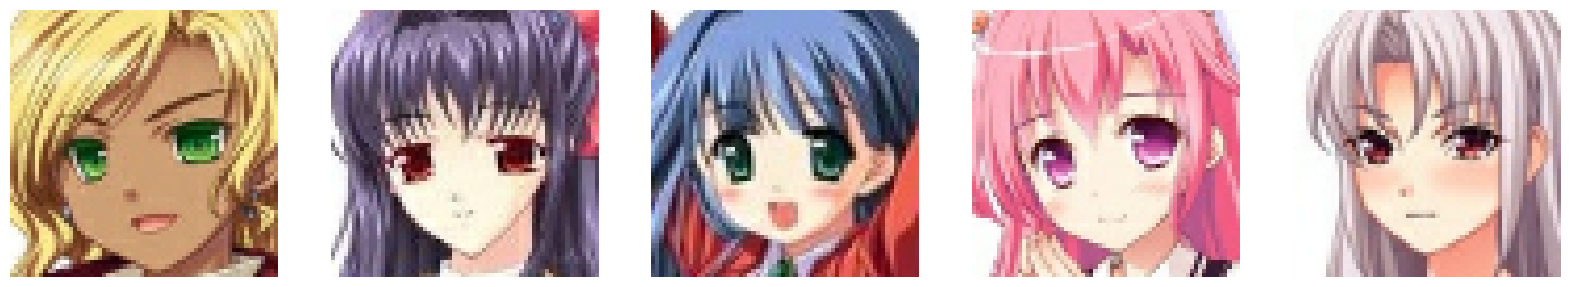

generated images


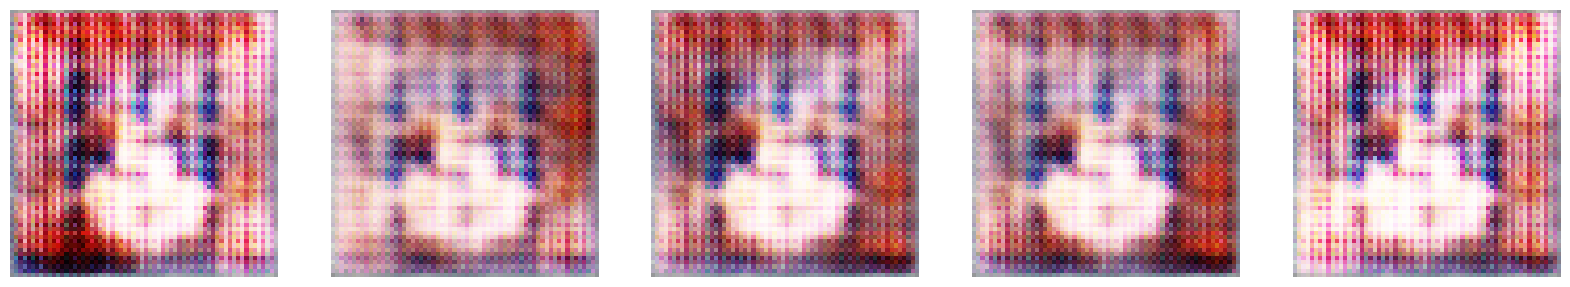

Time for epoch 1 is 227.98313450813293 sec


In [47]:
epochs=1

discriminator=make_discriminator()

generator= make_generator()


for epoch in range(epochs):

    #data for the true distribution of your real data samples training ste
    start = time.time()
    i=0
    for X in tqdm(normalized_ds, desc=f"epoch {epoch+1}", total=len(normalized_ds)):

        i+=1
        if i%1000:
            print("epoch {}, iteration {}".format(epoch+1, i))

        train_step(X)


    noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
    Xhat=generator(noise,training=False)
    X=[x for x in normalized_ds]
    print("orignal images")
    plot_array(X[0])
    print("generated images")
    plot_array(Xhat)
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

In [48]:
generator_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/data/generator.tar"
await skillsnetwork.prepare(generator_url, overwrite=True)

  0%|          | 0/7 [00:00<?, ?it/s]

Saved to '.'


In [49]:
from google.colab import output
output.enable_custom_widget_manager()

In [50]:
from google.colab import output
output.disable_custom_widget_manager()

In [51]:
from google.colab import output
output.disable_custom_widget_manager()

In [52]:
from google.colab import output
output.disable_custom_widget_manager()

In [53]:
from google.colab import output
output.disable_custom_widget_manager()

In [54]:
from google.colab import output
output.enable_custom_widget_manager()

In [55]:
from google.colab import output
output.disable_custom_widget_manager()

In [56]:
from google.colab import output
output.disable_custom_widget_manager()

In [57]:
from tensorflow.keras.models import load_model


full_generator=load_model("generator.keras")

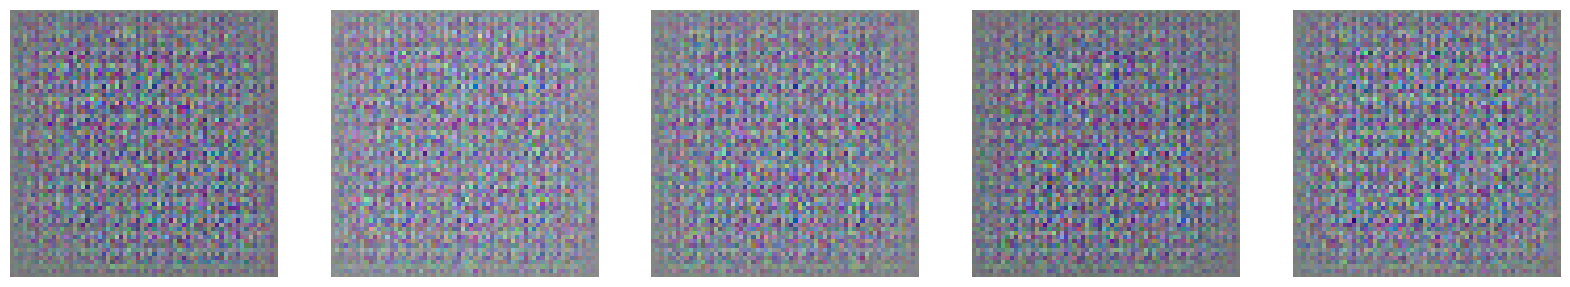

In [58]:
# Create noise
latent_dim = 100
noise = tf.random.normal([200, 1, 1, latent_dim])

# Use the new generator 'gen' instead of 'full_generator'
Xhat = gen(noise, training=False)  # Use 'gen' here, not 'full_generator'
plot_array(Xhat)

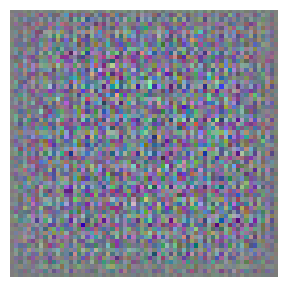

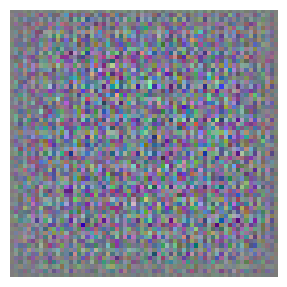

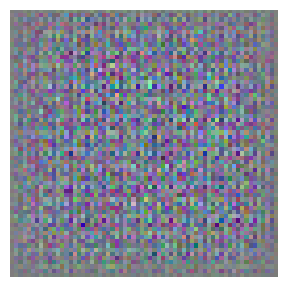

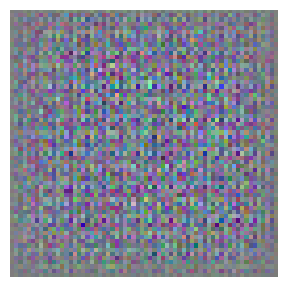

In [69]:
for c in [1,0.8,0.6,0.4]:
    Xhat=gen(c*tf.ones([1, 1, 1, latent_dim]),training=False) # latent_dim = 100 defined previously
    plot_array(Xhat)